# GenoDementia Detectives

### Purpose: to explore potential unbalances in the donor information dataset by building histograms by age and other demographic information

## Import Data

In [1]:
import pandas as pd
import pyarrow.parquet as pq
import os

import matplotlib.pyplot as plt
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%load_ext memory_profiler

In [18]:
#import donor info
donor_df = pd.read_csv("/home/stephtsa/DonorInformation.csv")

In [19]:
donor_df.shape

(107, 19)

In [20]:
#convert categorical to numeric
donor_df['gender'] = donor_df['sex'].map({'F': 1, 'M': 0})
#convert dementia/no dementia to numeric
donor_df['dementia_binary'] = donor_df['act_demented'].map({'Dementia': 1, 'No Dementia': 0})
#convert age
donor_df['age2'] = donor_df['age'].map({'87':87, '95-99':95, '85':85, '90-94':90, '100+':100, '89':89, '78':78, '83':83, '82':82, '77':77,
       '81':81, '88':88, '84':84, '86':86, '79':79})
#convert race binary
donor_df['race2'] = donor_df['race'].map({'White': 1, 'Non-white': 0})
donor_df.head()

,donor_id,name,age,sex,apo_e4_allele,education_years,age_at_first_tbi,longest_loc_duration,cerad,num_tbi_w_loc,...,ever_tbi_w_loc,race,hispanic,act_demented,braak,nia_reagan,gender,dementia_binary,age2,race2
0,326765665,H14.09.078,87,M,N,16,0,Unknown or N/A,0,0,...,N,White,Not Hispanic,No Dementia,1,1,0,0,87,1
1,326765656,H14.09.069,95-99,M,N,17,12,1-2 min,2,1,...,Y,White,Not Hispanic,No Dementia,5,2,0,0,95,1
2,326765654,H14.09.067,85,M,Y,10,72,< 10 sec,3,1,...,Y,White,Not Hispanic,Dementia,4,2,0,1,85,1
3,467056391,H15.09.103,90-94,F,N,11,87,< 10 sec,0,1,...,Y,White,Not Hispanic,No Dementia,4,0,1,0,90,1
4,309335447,H14.09.010,100+,M,Y,16,0,Unknown or N/A,3,0,...,N,White,Not Hispanic,Dementia,4,2,0,1,100,1


In [21]:
#filter cols of interest
donor_df.columns
donor_subset = donor_df[['donor_id', 'name', 'age', 'sex', 'apo_e4_allele', 'education_years','age_at_first_tbi', 'race', 'act_demented', 'braak','nia_reagan', 'gender', 'dementia_binary', 'age2', 'race2']]
donor_subset.head()



,donor_id,name,age,sex,apo_e4_allele,education_years,age_at_first_tbi,race,act_demented,braak,nia_reagan,gender,dementia_binary,age2,race2
0,326765665,H14.09.078,87,M,N,16,0,White,No Dementia,1,1,0,0,87,1
1,326765656,H14.09.069,95-99,M,N,17,12,White,No Dementia,5,2,0,0,95,1
2,326765654,H14.09.067,85,M,Y,10,72,White,Dementia,4,2,0,1,85,1
3,467056391,H15.09.103,90-94,F,N,11,87,White,No Dementia,4,0,1,0,90,1
4,309335447,H14.09.010,100+,M,Y,16,0,White,Dementia,4,2,0,1,100,1


# Visualization

In [22]:
donor_df.head()

,donor_id,name,age,sex,apo_e4_allele,education_years,age_at_first_tbi,longest_loc_duration,cerad,num_tbi_w_loc,...,ever_tbi_w_loc,race,hispanic,act_demented,braak,nia_reagan,gender,dementia_binary,age2,race2
0,326765665,H14.09.078,87,M,N,16,0,Unknown or N/A,0,0,...,N,White,Not Hispanic,No Dementia,1,1,0,0,87,1
1,326765656,H14.09.069,95-99,M,N,17,12,1-2 min,2,1,...,Y,White,Not Hispanic,No Dementia,5,2,0,0,95,1
2,326765654,H14.09.067,85,M,Y,10,72,< 10 sec,3,1,...,Y,White,Not Hispanic,Dementia,4,2,0,1,85,1
3,467056391,H15.09.103,90-94,F,N,11,87,< 10 sec,0,1,...,Y,White,Not Hispanic,No Dementia,4,0,1,0,90,1
4,309335447,H14.09.010,100+,M,Y,16,0,Unknown or N/A,3,0,...,N,White,Not Hispanic,Dementia,4,2,0,1,100,1


In [44]:
donor_df.columns

Index(['donor_id', 'name', 'age', 'sex', 'apo_e4_allele', 'education_years',
       'age_at_first_tbi', 'longest_loc_duration', 'cerad', 'num_tbi_w_loc',
       'dsm_iv_clinical_diagnosis', 'control_set', 'nincds_arda_diagnosis',
       'ever_tbi_w_loc', 'race', 'hispanic', 'act_demented', 'braak',
       'nia_reagan', 'gender', 'dementia_binary', 'age2', 'race2'],
      dtype='object')

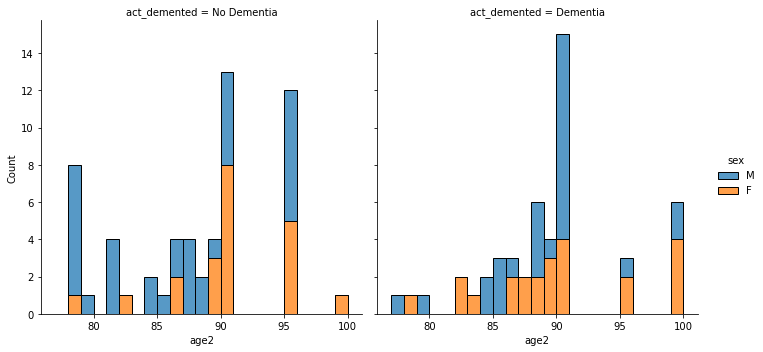

In [49]:
#histogram by age

sns.displot(data=donor_df, x="age2", hue="sex",multiple = "stack",binwidth=1, col="act_demented")

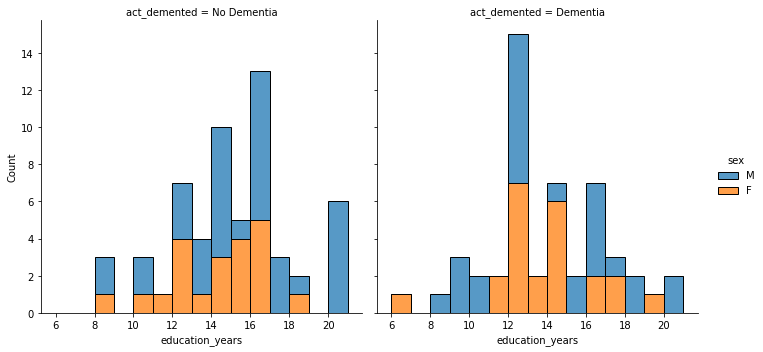

In [51]:
sns.displot(data=donor_df, x="education_years", hue="sex",multiple = "stack",binwidth=1, col="act_demented")

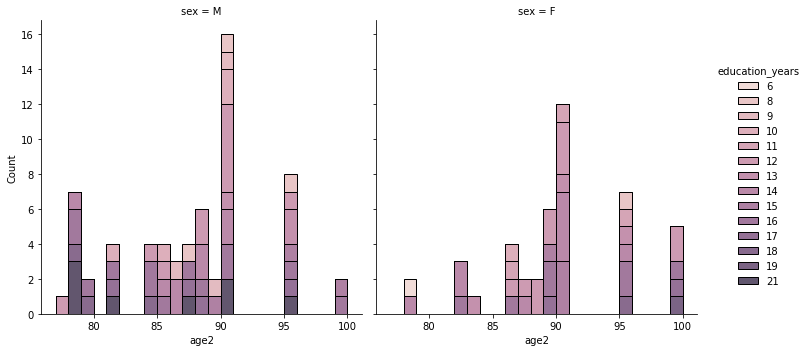

In [55]:
sns.displot(data=donor_df, x="age2", hue="education_years",multiple = "stack",binwidth=1, col="sex")

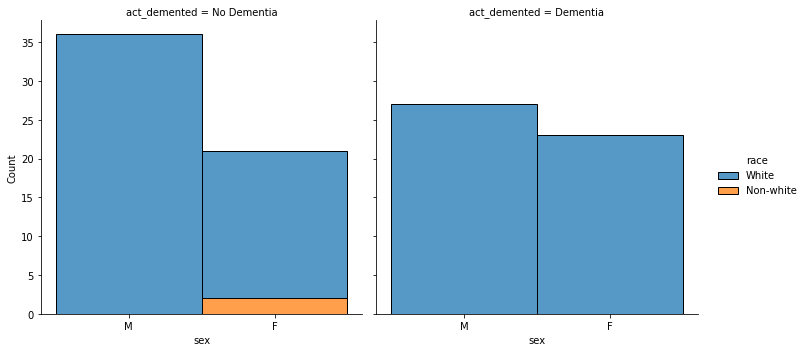

In [57]:
sns.displot(data=donor_df, x="sex", hue="race",multiple = "stack",binwidth=1, col="act_demented")

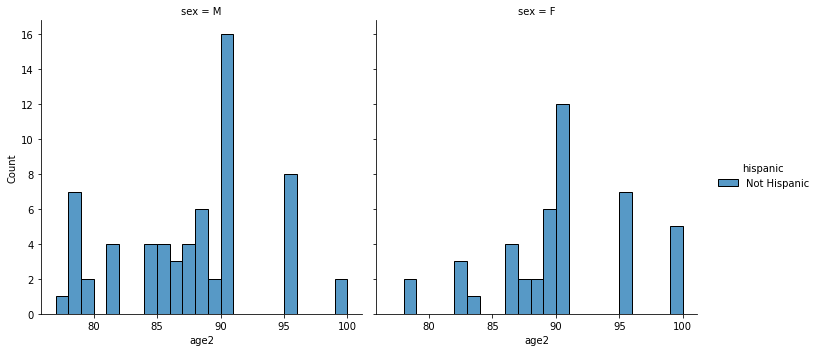

In [41]:
sns.displot(data=donor_df, x="age2", hue="hispanic",multiple = "stack",binwidth=1, col="sex")

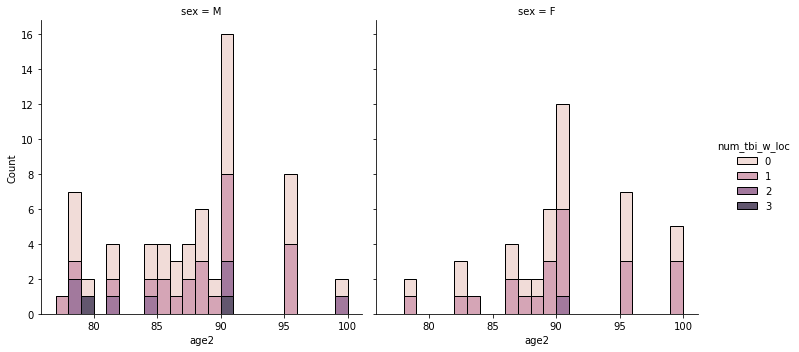

In [45]:
sns.displot(data=donor_df, x="age2", hue="num_tbi_w_loc",multiple = "stack",binwidth=1, col="sex")

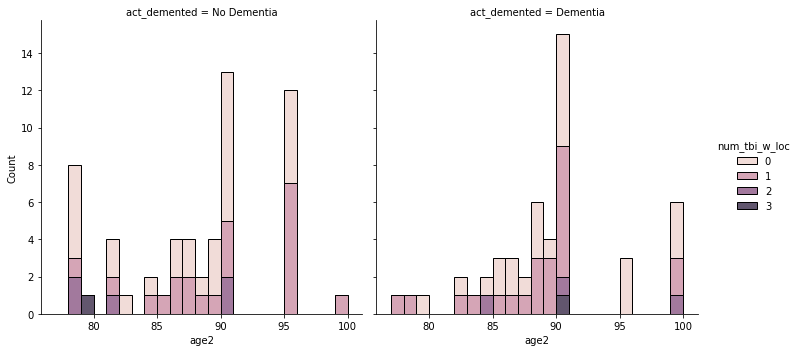

In [47]:
sns.displot(data=donor_df, x="age2", hue="num_tbi_w_loc",multiple = "stack",binwidth=1, col="act_demented")